<a href="https://colab.research.google.com/github/chavjohn/chavjohn/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OBJECTIVE: ANALYZE DATASET, SHOW COMPARISON OF THE AMOUNT OF BLACKS VS. WHITES THAT WERE ARRESTED DURING FROM JANUARY 2022 TO JUNE 2022 IN BRONX AND MANHATTAN

Viewing Dataset

Import matplotlib & pandas

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns

Load File & Show Dataset Info

In [2]:
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_ 1.csv') 
df.info

<bound method DataFrame.info of       BOROUGH AGE GROUP GENDER            RACE
0           K     18-24      M           BLACK
1           K     25-44      M           BLACK
2           K     25-44      M           WHITE
3           K     45-64      M           BLACK
4           Q     25-44      M           BLACK
...       ...       ...    ...             ...
84740       B     25-44      M  BLACK HISPANIC
84741       B     25-44      M           BLACK
84742       M     45-64      F  WHITE HISPANIC
84743       B     25-44      F  BLACK HISPANIC
84744       M     45-64      M  WHITE HISPANIC

[84745 rows x 4 columns]>

Dataset Size

In [3]:
df.shape


(84745, 4)

Dataset Columns

In [4]:
df.columns



Index(['BOROUGH', 'AGE GROUP', 'GENDER', 'RACE'], dtype='object')

Rename Columns

Top Rows

In [5]:
df.head()


,BOROUGH,AGE GROUP,GENDER,RACE
0,K,18-24,M,BLACK
1,K,25-44,M,BLACK
2,K,25-44,M,WHITE
3,K,45-64,M,BLACK
4,Q,25-44,M,BLACK


Bottom Rows

In [6]:
df.tail()

,BOROUGH,AGE GROUP,GENDER,RACE
84740,B,25-44,M,BLACK HISPANIC
84741,B,25-44,M,BLACK
84742,M,45-64,F,WHITE HISPANIC
84743,B,25-44,F,BLACK HISPANIC
84744,M,45-64,M,WHITE HISPANIC


Getting Data Info

In [7]:
df['RACE'].value_counts()

BLACK                             46114
WHITE HISPANIC                    18184
WHITE                              9962
BLACK HISPANIC                     5828
ASIAN / PACIFIC ISLANDER           4200
UNKNOWN                             261
AMERICAN INDIAN/ALASKAN NATIVE      196
Name: RACE, dtype: int64

REMOVE NULL VALUES

In [8]:
df.isnull()

,BOROUGH,AGE GROUP,GENDER,RACE
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
84740,False,False,False,False
84741,False,False,False,False
84742,False,False,False,False
84743,False,False,False,False


In [9]:
df.notnull()

,BOROUGH,AGE GROUP,GENDER,RACE
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
84740,True,True,True,True
84741,True,True,True,True
84742,True,True,True,True
84743,True,True,True,True


In [10]:
df.isnull().sum()

BOROUGH      0
AGE GROUP    0
GENDER       0
RACE         0
dtype: int64

In [11]:
df.value_counts(dropna=False) 
df.apply(pd.Series.value_counts) 

,BOROUGH,AGE GROUP,GENDER,RACE
18-24,NaN,12389.0,NaN,NaN
25-44,NaN,50797.0,NaN,NaN
45-64,NaN,17588.0,NaN,NaN
65+,NaN,1286.0,NaN,NaN
<18,NaN,2685.0,NaN,NaN
AMERICAN INDIAN/ALASKAN NATIVE,NaN,NaN,NaN,196.0
ASIAN / PACIFIC ISLANDER,NaN,NaN,NaN,4200.0
B,15277.0,NaN,NaN,NaN
BLACK,NaN,NaN,NaN,46114.0
BLACK HISPANIC,NaN,NaN,NaN,5828.0


DROP NA 

In [12]:
df.dropna(axis=1)

,BOROUGH,AGE GROUP,GENDER,RACE
0,K,18-24,M,BLACK
1,K,25-44,M,BLACK
2,K,25-44,M,WHITE
3,K,45-64,M,BLACK
4,Q,25-44,M,BLACK
...,...,...,...,...
84740,B,25-44,M,BLACK HISPANIC
84741,B,25-44,M,BLACK
84742,M,45-64,F,WHITE HISPANIC
84743,B,25-44,F,BLACK HISPANIC


GROUP COLUMNS

In [13]:
df.groupby(['BOROUGH','RACE','GENDER','AGE GROUP']).count()


Empty DataFrame
Columns: []
Index: [(B, AMERICAN INDIAN/ALASKAN NATIVE, F, 25-44), (B, AMERICAN INDIAN/ALASKAN NATIVE, F, 45-64), (B, AMERICAN INDIAN/ALASKAN NATIVE, F, 65+), (B, AMERICAN INDIAN/ALASKAN NATIVE, M, 25-44), (B, AMERICAN INDIAN/ALASKAN NATIVE, M, 45-64), (B, ASIAN / PACIFIC ISLANDER, F, 25-44), (B, ASIAN / PACIFIC ISLANDER, F, 45-64), (B, ASIAN / PACIFIC ISLANDER, F, 65+), (B, ASIAN / PACIFIC ISLANDER, M, 25-44), (B, ASIAN / PACIFIC ISLANDER, M, 45-64), (B, ASIAN / PACIFIC ISLANDER, M, 65+), (B, BLACK, F, 25-44), (B, BLACK, F, 45-64), (B, BLACK, F, 65+), (B, BLACK, M, 25-44), (B, BLACK, M, 45-64), (B, BLACK, M, 65+), (B, BLACK HISPANIC, F, 25-44), (B, BLACK HISPANIC, F, 45-64), (B, BLACK HISPANIC, F, 65+), (B, BLACK HISPANIC, M, 25-44), (B, BLACK HISPANIC, M, 45-64), (B, BLACK HISPANIC, M, 65+), (B, UNKNOWN, F, 25-44), (B, UNKNOWN, F, 45-64), (B, UNKNOWN, M, 25-44), (B, UNKNOWN, M, 45-64), (B, WHITE, F, 25-44), (B, WHITE, F, 45-64), (B, WHITE, F, 65+), (B, WHITE, M, 25-44), (B, WHITE, M, 45-64), (B, WHITE, M, 65+), (B, WHITE HISPANIC, F, 25-44), (B, WHITE HISPANIC, F, 45-64), (B, WHITE HISPANIC, F, 65+), (B, WHITE HISPANIC, M, 25-44), (B, WHITE HISPANIC, M, 45-64), (B, WHITE HISPANIC, M, 65+), (BRONX, BLACK, F, 18-24), (BRONX, BLACK, F, <18), (BRONX, BLACK, M, 18-24), (BRONX, BLACK, M, <18), (BRONX, WHITE, F, 18-24), (BRONX, WHITE, F, <18), (BRONX, WHITE, M, 18-24), (BRONX, WHITE, M, <18), (K, AMERICAN INDIAN/ALASKAN NATIVE, F, 25-44), (K, AMERICAN INDIAN/ALASKAN NATIVE, M, 18-24), (K, AMERICAN INDIAN/ALASKAN NATIVE, M, 25-44), (K, AMERICAN INDIAN/ALASKAN NATIVE, M, 45-64), (K, AMERICAN INDIAN/ALASKAN NATIVE, M, 65+), (K, AMERICAN INDIAN/ALASKAN NATIVE, M, <18), (K, ASIAN / PACIFIC ISLANDER, F, 18-24), (K, ASIAN / PACIFIC ISLANDER, F, 25-44), (K, ASIAN / PACIFIC ISLANDER, F, 45-64), (K, ASIAN / PACIFIC ISLANDER, F, 65+), (K, ASIAN / PACIFIC ISLANDER, F, <18), (K, ASIAN / PACIFIC ISLANDER, M, 18-24), (K, ASIAN / PACIFIC ISLANDER, M, 25-44), (K, ASIAN / PACIFIC ISLANDER, M, 45-64), (K, ASIAN / PACIFIC ISLANDER, M, 65+), (K, ASIAN / PACIFIC ISLANDER, M, <18), (K, BLACK, F, 18-24), (K, BLACK, F, 25-44), (K, BLACK, F, 45-64), (K, BLACK, F, 65+), (K, BLACK, F, <18), (K, BLACK, M, 18-24), (K, BLACK, M, 25-44), (K, BLACK, M, 45-64), (K, BLACK, M, 65+), (K, BLACK, M, <18), (K, BLACK HISPANIC, F, 18-24), (K, BLACK HISPANIC, F, 25-44), (K, BLACK HISPANIC, F, 45-64), (K, BLACK HISPANIC, F, 65+), (K, BLACK HISPANIC, F, <18), (K, BLACK HISPANIC, M, 18-24), (K, BLACK HISPANIC, M, 25-44), (K, BLACK HISPANIC, M, 45-64), (K, BLACK HISPANIC, M, 65+), (K, BLACK HISPANIC, M, <18), (K, UNKNOWN, F, 25-44), (K, UNKNOWN, F, 45-64), (K, UNKNOWN, M, 18-24), (K, UNKNOWN, M, 25-44), (K, UNKNOWN, M, 45-64), (K, UNKNOWN, M, <18), (K, WHITE, F, 18-24), (K, WHITE, F, 25-44), (K, WHITE, F, 45-64), (K, WHITE, F, 65+), (K, WHITE, F, <18), (K, WHITE, M, 18-24), (K, WHITE, M, 25-44), (K, WHITE, M, 45-64), (K, WHITE, M, 65+), (K, WHITE, M, <18), (K, WHITE HISPANIC, F, 18-24), ...]

[277 rows x 0 columns]

In [14]:
df.groupby('BOROUGH')['RACE', 'GENDER','AGE GROUP'].count()


,RACE,GENDER,AGE GROUP
BOROUGH,,,
B,15277,15277,15277
BRONX,2516,2516,2516
K,24307,24307,24307
M,20629,20629,20629
Q,18022,18022,18022
S,3994,3994,3994


In [15]:
counts = df.nunique()
print(df.nunique())

BOROUGH      6
AGE GROUP    5
GENDER       2
RACE         7
dtype: int64


In [16]:
df.sort_values(['BOROUGH','RACE'],ascending=False).groupby('GENDER').head()


,BOROUGH,AGE GROUP,GENDER,RACE
7965,S,25-44,M,WHITE HISPANIC
8021,S,45-64,M,WHITE HISPANIC
8170,S,18-24,F,WHITE HISPANIC
8307,S,25-44,F,WHITE HISPANIC
8330,S,25-44,M,WHITE HISPANIC
8561,S,25-44,M,WHITE HISPANIC
8629,S,25-44,M,WHITE HISPANIC
8773,S,18-24,F,WHITE HISPANIC
9180,S,45-64,F,WHITE HISPANIC
10162,S,45-64,F,WHITE HISPANIC


In [17]:
df.groupby('BOROUGH')['AGE GROUP'].nunique()

BOROUGH
B        3
BRONX    2
K        5
M        5
Q        5
S        5
Name: AGE GROUP, dtype: int64

In [18]:
subset = df[['RACE', 'AGE GROUP']].count()

subset.head()

RACE         84745
AGE GROUP    84745
dtype: int64

VISUALIZE DATA

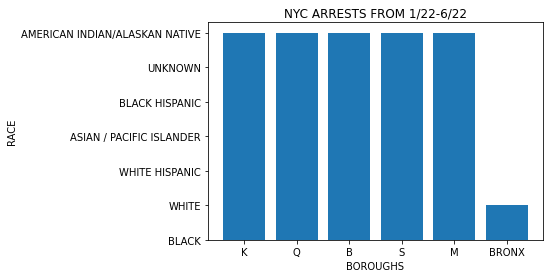

In [19]:
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date_ 1.csv")
 
plt.bar(df['BOROUGH'], df['RACE'])

plt.title("NYC ARRESTS FROM 1/22-6/22")
 
# Setting the X and Y labels
plt.xlabel('BOROUGHS')
plt.ylabel('RACE')
 
# Adding the legends
plt.show()